# **Week 2 Task 2 - Love Sahaj**

In [17]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import expon,uniform,randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [19]:
df = pd.read_csv('EmployeeAttrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [20]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [21]:
df.drop(columns=['Over18', 'EmployeeNumber', 'EmployeeCount'])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [22]:
df["Attrition"] = df["Attrition"].apply(lambda x : 1 if x == "Yes" else 0)
df['OverTime'] = df['OverTime'].map({"Yes" : 1, "No" : 2})

In [23]:
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely' : 1, 'Travel_Frequently' : 2, 'Non-Travel' : 0})

One-Hot Encoding for EducationField, Department, JobRole, Gender & MaritalStatus

In [24]:
df_dummies_educationfield =  pd.get_dummies(df.EducationField, prefix='EducationField')
df_dummies_department = pd.get_dummies(df.Department, prefix='Department')
df_dummies_jobrole = pd.get_dummies(df.JobRole, prefix='JobRole')

In [25]:
df_dummies_gender = pd.get_dummies(df.Gender, prefix = 'Gender')
df_dummies_marital = pd.get_dummies(df.MaritalStatus, prefix= 'MaritalStatus')

In [26]:
df_new = pd.concat([df, df_dummies_educationfield, df_dummies_department, df_dummies_jobrole, df_dummies_gender, df_dummies_marital], axis=1)

Over18, EmployeeNumber, EmployeeCount, StandardHours are not going to affect our model so we don't need them.

In [27]:
df_new = df_new.drop(['EducationField', 'Department', 'JobRole', 'Gender', 'MaritalStatus', 'Over18', 'EmployeeNumber', 'EmployeeCount', 'StandardHours'], axis=1)

[27, 606, 159, 464, 82, 132]


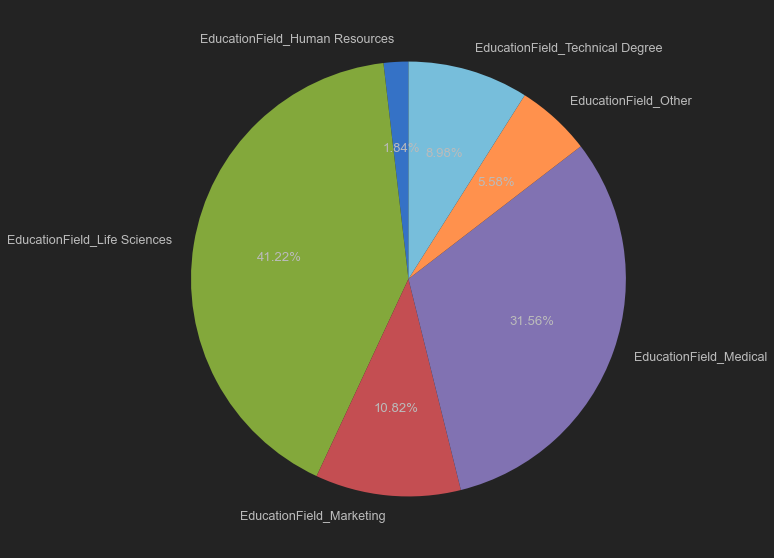

In [28]:
education_field_list = list(df_dummies_educationfield.columns)
education_field_count = list(df_new[item].sum() for item in education_field_list)
print(education_field_count)
plt.figure(figsize=(10,10))
plt.pie(education_field_count, labels=education_field_list, startangle=90, autopct='%1.2f%%')
plt.show()

[63, 961, 446]


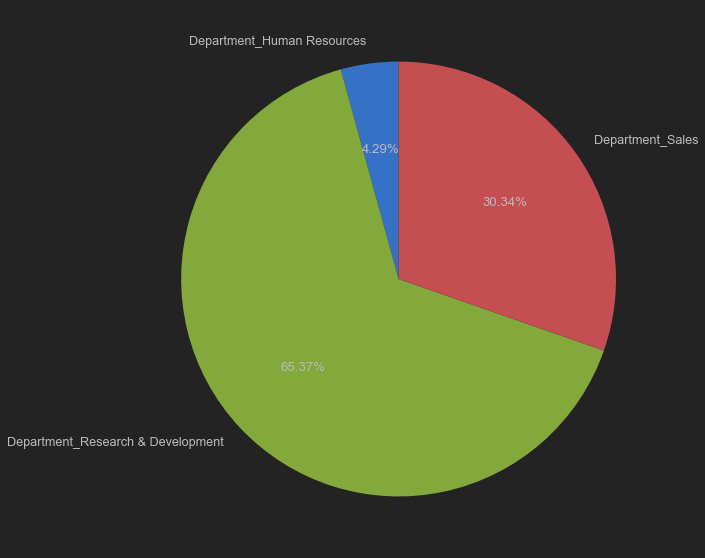

In [29]:
department_list = list(df_dummies_department.columns)
department_count = list(df_new[item].sum() for item in department_list)
print(department_count)
plt.figure(figsize=(10,10))
plt.pie(department_count, labels=department_list, startangle=90, autopct='%1.2f%%')
plt.show()

[131, 52, 259, 102, 145, 80, 292, 326, 83]


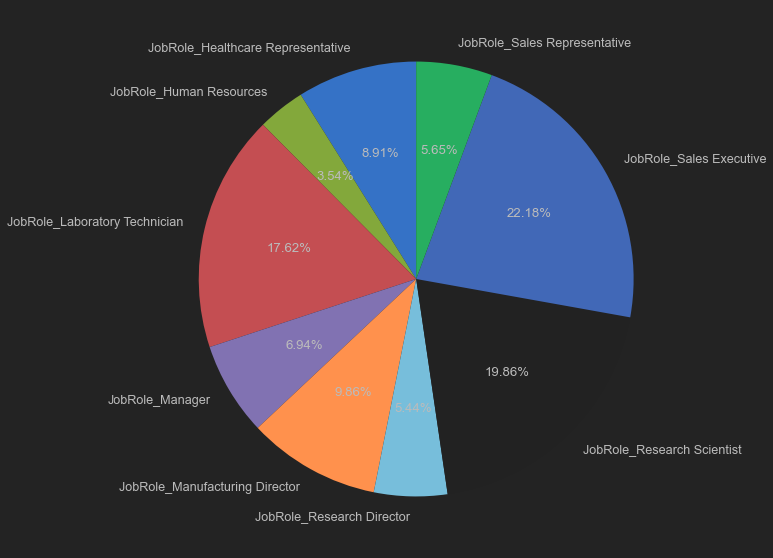

In [30]:
jobrole_list = list(df_dummies_jobrole.columns)
jobrole_count = list(df_new[item].sum() for item in jobrole_list)
print(jobrole_count)
plt.figure(figsize=(10,10))
plt.pie(jobrole_count, labels=jobrole_list, startangle=90, autopct='%1.2f%%')
plt.show()

In [31]:
df_new.columns = df_new.columns.str.replace(' ', '')
df_new.columns = df_new.columns.str.replace('_', '')
df_new.columns = df_new.columns.str.replace('&', '')

In [32]:
df_new.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EducationFieldHumanResources',
       'EducationFieldLifeSciences', 'EducationFieldMarketing',
       'EducationFieldMedical', 'EducationFieldOther',
       'EducationFieldTechnicalDegree', 'DepartmentHumanResources',
       'DepartmentResearchDevelopment', 'DepartmentSales',
       'JobRoleHealthcareRepresentative', 'JobRoleHumanResources',
       'JobRoleLaboratoryTechnician', 'JobRoleManager',
       'JobRoleManufacturingDirector', 'JobRoleResearchDi

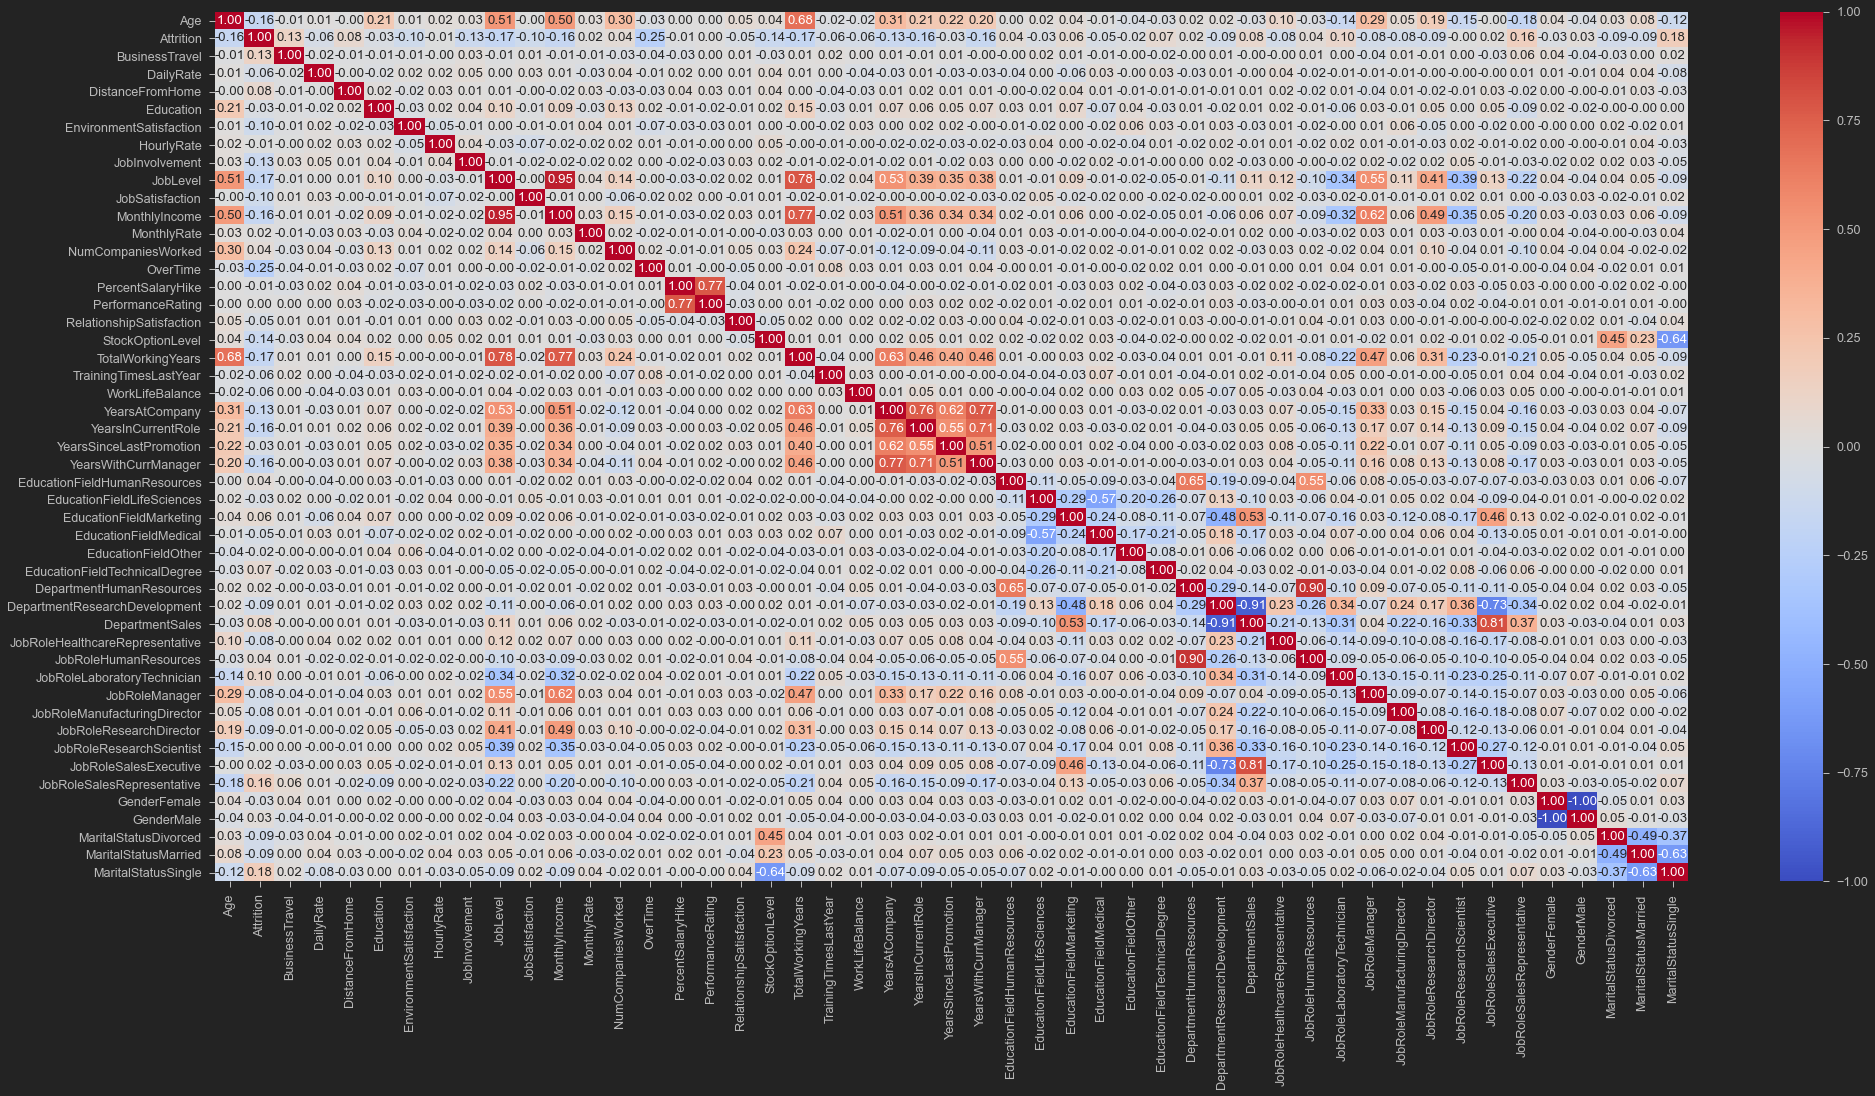

In [33]:
data_correlation = df_new.corr()
plt.figure(figsize = (33, 16))
sns.heatmap(data_correlation,
            xticklabels=df_new.columns.values,
            yticklabels=df_new.columns.values, fmt='0.2f', cmap='coolwarm', annot = True)

In [34]:
data_correlation['Attrition'].sort_values(ascending=False)

Attrition                          1.000000
MaritalStatusSingle                0.175419
JobRoleSalesRepresentative         0.157234
BusinessTravel                     0.127006
JobRoleLaboratoryTechnician        0.098290
DepartmentSales                    0.080855
DistanceFromHome                   0.077924
EducationFieldTechnicalDegree      0.069355
EducationFieldMarketing            0.055781
NumCompaniesWorked                 0.043494
EducationFieldHumanResources       0.036466
JobRoleHumanResources              0.036215
GenderMale                         0.029453
JobRoleSalesExecutive              0.019774
DepartmentHumanResources           0.016832
MonthlyRate                        0.015170
PerformanceRating                  0.002889
JobRoleResearchScientist          -0.000360
HourlyRate                        -0.006846
PercentSalaryHike                 -0.013478
EducationFieldOther               -0.017898
GenderFemale                      -0.029453
Education                       

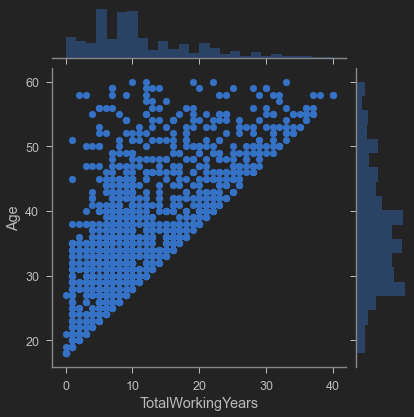

In [35]:
sns.jointplot(y = 'Age', x = 'TotalWorkingYears',data=df_new)

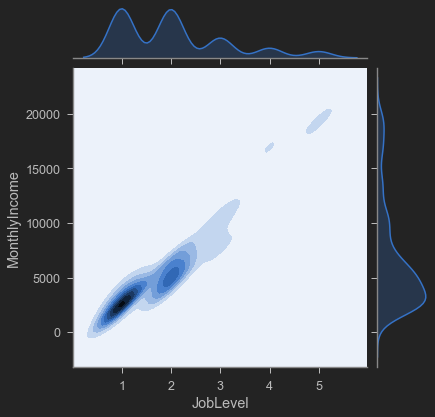

In [36]:
with sns.axes_style():
    sns.jointplot(x='JobLevel', y='MonthlyIncome', kind="kde", data= df_new);

In [37]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,cross_val_predict,validation_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, mean_absolute_error

In [38]:
all_features = list(df_new.columns.values)
all_features.remove('Attrition')

In [39]:
y = df_new['Attrition']
x = df_new[all_features]
x_train,x_test, y_train, y_test = train_test_split(x, y, random_state=0)


In [40]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(x_train)

x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

In [41]:
print("Dimensions of the Data")
print(f"Shape of x_train : {x_train.shape}")
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of x_test : {x_test.shape}')
print(f'Shape of y_test : {y_test.shape}')

Dimensions of the Data
Shape of x_train : (1102, 48)
Shape of y_train : (1102,)
Shape of x_test : (368, 48)
Shape of y_test : (368,)


In [42]:
print ("\nx_train descriptive statistics:\n\n",x_train.agg([np.mean, np.std]))
print ("\nx_test descriptive statistics:\n\n",x_test.agg([np.mean, np.std]))


x_train descriptive statistics:

             Age  BusinessTravel   DailyRate  DistanceFromHome  Education  \
mean  36.823049        1.081670  804.224138          9.109800   2.930127   
std    9.024263        0.534589  407.496329          8.087269   1.003907   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
mean                 2.749546   65.257713        2.727768  2.058984   
std                  1.097795   20.387544        0.717202  1.105336   

      JobSatisfaction  ...  JobRoleManufacturingDirector  \
mean         2.733212  ...                      0.094374   
std          1.095596  ...                      0.292481   

      JobRoleResearchDirector  JobRoleResearchScientist  \
mean                 0.056261                  0.205989   
std                  0.230530                  0.404606   

      JobRoleSalesExecutive  JobRoleSalesRepresentative  GenderFemale  \
mean               0.221416                    0.054446      0.386570   
std              

In [43]:
def classification_accuracy_report(actual,predicted):
    print ("\nAccuracy Score on Test Data: ", accuracy_score(actual,predicted))
    print ("\nConfusion Matrix on Test Data:\n", confusion_matrix(actual,predicted))
    print ("\nClassification Report on Test Data:\n",classification_report(actual,predicted))
    print ("\nMean Absolute Error on Test Data:\n", mean_absolute_error(actual, predicted))

def plot_validation_curve_decision_tree(train_scores,test_scores):
    #Citation: https://datascience.stackexchange.com/questions/26955/validation-curve-differs-from-cross-val-score
    param_range=np.arange(1, 50, 5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with Decision Tree Classifier")
    plt.xlabel("max_depth")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

## **Logistic Regression Model**

In [44]:
from sklearn.linear_model import LogisticRegression

logictic_model = LogisticRegression(max_iter=10000)
logictic_model.fit(x_train, y_train)
score = cross_val_score(logictic_model, x_train, y_train, cv=10)

In [45]:
prediction = logictic_model.predict(x_test)
print('Cross Validation Score on Training Data', score)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Cross Validation Score on Training Data [0.89189189 0.81981982 0.88181818 0.85454545 0.87272727 0.87272727
 0.86363636 0.85454545 0.87272727 0.88181818]
Accuracy: 0.87 (+/- 0.04)


In [46]:
classification_accuracy_report(y_test, prediction)


Accuracy Score on Test Data:  0.8804347826086957

Confusion Matrix on Test Data:
 [[304   6]
 [ 38  20]]

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       310
           1       0.77      0.34      0.48        58

    accuracy                           0.88       368
   macro avg       0.83      0.66      0.70       368
weighted avg       0.87      0.88      0.86       368


Mean Absolute Error on Test Data:
 0.11956521739130435


Normalized Data

In [47]:
logictic_model = LogisticRegression(max_iter=10000)
logictic_model.fit(x_train_norm, y_train)
score = cross_val_score(logictic_model, x_train_norm, y_train, cv=10)

prediction = logictic_model.predict(x_test_norm)
print('Cross Validation Score on Training Data', score)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

classification_accuracy_report(y_test, prediction)

Cross Validation Score on Training Data [0.89189189 0.86486486 0.86363636 0.88181818 0.85454545 0.87272727
 0.89090909 0.88181818 0.86363636 0.9       ]
Accuracy: 0.88 (+/- 0.03)

Accuracy Score on Test Data:  0.8913043478260869

Confusion Matrix on Test Data:
 [[305   5]
 [ 35  23]]

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       310
           1       0.82      0.40      0.53        58

    accuracy                           0.89       368
   macro avg       0.86      0.69      0.74       368
weighted avg       0.89      0.89      0.87       368


Mean Absolute Error on Test Data:
 0.10869565217391304


# **Gaussian Naive Bayes Model**

In [48]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train, y_train)
train_score = cross_val_score(naive_bayes_model, x_train, y_train)

In [49]:
prediction = naive_bayes_model.predict(x_test)
print('Cross Validation Score on Training Data', score)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
test_score = cross_val_score(naive_bayes_model, x_test, y_test)

Cross Validation Score on Training Data [0.89189189 0.86486486 0.86363636 0.88181818 0.85454545 0.87272727
 0.89090909 0.88181818 0.86363636 0.9       ]
Accuracy: 0.88 (+/- 0.03)


In [50]:
classification_accuracy_report(y_test,prediction)


Accuracy Score on Test Data:  0.7635869565217391

Confusion Matrix on Test Data:
 [[243  67]
 [ 20  38]]

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.92      0.78      0.85       310
           1       0.36      0.66      0.47        58

    accuracy                           0.76       368
   macro avg       0.64      0.72      0.66       368
weighted avg       0.84      0.76      0.79       368


Mean Absolute Error on Test Data:
 0.23641304347826086


Normalized Data

In [51]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train_norm, y_train)
train_score = cross_val_score(naive_bayes_model, x_train_norm, y_train)

prediction = naive_bayes_model.predict(x_test_norm)
print('Cross Validation Score on Training Data', score)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
test_score = cross_val_score(naive_bayes_model, x_test_norm, y_test)

classification_accuracy_report(y_test,prediction)


Cross Validation Score on Training Data [0.89189189 0.86486486 0.86363636 0.88181818 0.85454545 0.87272727
 0.89090909 0.88181818 0.86363636 0.9       ]
Accuracy: 0.88 (+/- 0.03)

Accuracy Score on Test Data:  0.6684782608695652

Confusion Matrix on Test Data:
 [[206 104]
 [ 18  40]]

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.92      0.66      0.77       310
           1       0.28      0.69      0.40        58

    accuracy                           0.67       368
   macro avg       0.60      0.68      0.58       368
weighted avg       0.82      0.67      0.71       368


Mean Absolute Error on Test Data:
 0.33152173913043476


# **Decision Tree Classifier**

In [52]:
from sklearn.tree import DecisionTreeClassifier

decision_trees = DecisionTreeClassifier()
decision_trees.fit(x_train, y_train)
train_score = cross_val_score(decision_trees, x_train, y_train, cv = 10 )

In [53]:
prediction = decision_trees.predict(x_test)
print("Cross Validation Score on Training data: ", train_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

test_score = cross_val_score(decision_trees, x_test, y_test, cv = 10 )

classification_accuracy_report(y_test, prediction)

Cross Validation Score on Training data:  [0.76576577 0.74774775 0.78181818 0.71818182 0.78181818 0.70909091
 0.75454545 0.78181818 0.81818182 0.78181818]
Accuracy: 0.88 (+/- 0.03)

Accuracy Score on Test Data:  0.7934782608695652

Confusion Matrix on Test Data:
 [[274  36]
 [ 40  18]]

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       310
           1       0.33      0.31      0.32        58

    accuracy                           0.79       368
   macro avg       0.60      0.60      0.60       368
weighted avg       0.79      0.79      0.79       368


Mean Absolute Error on Test Data:
 0.20652173913043478


Normalized Data

In [54]:
decision_trees = DecisionTreeClassifier()
#decision_trees.fit(x_train_norm, y_train)
# train_score = cross_val_score(decision_trees, x_train_norm, y_train, cv = 10 )

grid = {
    'criterion' : ['gini', "entropy"],
    'max_depth' : [5, 10, 20, 100, 1000],
    'min_samples_split' : [2, 3, 4, 5],
    'min_samples_leaf' : [1, 3, 5, 7]
}

decision_trees_grid_searchcv = GridSearchCV(decision_trees, grid, n_jobs=-1)
decision_trees_grid_searchcv.fit(x_train_norm, y_train)

prediction = decision_trees_grid_searchcv.predict(x_test_norm)
print("Cross Validation Score on Training data: ", train_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

#test_score = cross_val_score(decision_trees, x_test_norm, y_test, cv = 10 )

classification_accuracy_report(y_test, prediction)

Cross Validation Score on Training data:  [0.76576577 0.74774775 0.78181818 0.71818182 0.78181818 0.70909091
 0.75454545 0.78181818 0.81818182 0.78181818]
Accuracy: 0.88 (+/- 0.03)

Accuracy Score on Test Data:  0.8505434782608695

Confusion Matrix on Test Data:
 [[293  17]
 [ 38  20]]

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.89      0.95      0.91       310
           1       0.54      0.34      0.42        58

    accuracy                           0.85       368
   macro avg       0.71      0.64      0.67       368
weighted avg       0.83      0.85      0.84       368


Mean Absolute Error on Test Data:
 0.14945652173913043


In [55]:
decision_trees_grid_searchcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=4)

# **Stochastic Gradient Decent Classifier**

In [56]:
from sklearn.linear_model import SGDClassifier

sgd_classifier=SGDClassifier(max_iter=8000,penalty='elasticnet',random_state=42)
param_grid={'loss':['log','hinge','modified_huber'],'alpha':expon(scale=1),'l1_ratio':uniform(0,1)}
hyper_params_search_sgd=RandomizedSearchCV(estimator=sgd_classifier,param_distributions=param_grid,n_iter=5,random_state=42)
hyper_params_search_sgd.fit(x_train,y_train)

print ("FINDING NEAR OPTIMAL HYPER-PARAMETERS USING RANDOMIZED SEARCH FOR ELASTICNET LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER")
print ("\nBest Estimator:\n",hyper_params_search_sgd.best_estimator_)
train_score = cross_val_score(sgd_classifier, x_train, y_train, cv = 10)

FINDING NEAR OPTIMAL HYPER-PARAMETERS USING RANDOMIZED SEARCH FOR ELASTICNET LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER

Best Estimator:
 SGDClassifier(alpha=0.16959629191460518, l1_ratio=0.05808361216819946,
              loss='log', max_iter=8000, penalty='elasticnet', random_state=42)


In [57]:
prediction = hyper_params_search_sgd.predict(x_test)
print("Cross Validation Score on Training data: ", train_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

test_score = cross_val_score(hyper_params_search_sgd, x_test, y_test, cv = 10 )

classification_accuracy_report(y_test, prediction)

Cross Validation Score on Training data:  [0.83783784 0.83783784 0.84545455 0.83636364 0.55454545 0.83636364
 0.83636364 0.83636364 0.83636364 0.83636364]
Accuracy: 0.88 (+/- 0.03)

Accuracy Score on Test Data:  0.7445652173913043

Confusion Matrix on Test Data:
 [[255  55]
 [ 39  19]]

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       310
           1       0.26      0.33      0.29        58

    accuracy                           0.74       368
   macro avg       0.56      0.58      0.57       368
weighted avg       0.77      0.74      0.76       368


Mean Absolute Error on Test Data:
 0.2554347826086957


Normalized Data

In [58]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV

sgd_classifier=SGDClassifier(max_iter=8000,penalty='elasticnet',random_state=42)
param_grid={'loss':['log','hinge','modified_huber'],'alpha':expon(scale=1),'l1_ratio':uniform(0,1)}
hyper_params_search_sgd=RandomizedSearchCV(estimator=sgd_classifier,param_distributions=param_grid,n_iter=5,random_state=42)
hyper_params_search_sgd.fit(x_train_norm,y_train)

print ("FINDING NEAR OPTIMAL HYPER-PARAMETERS USING RANDOMIZED SEARCH FOR ELASTICNET LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER")
print ("\nBest Estimator:\n",hyper_params_search_sgd.best_estimator_)
train_score = cross_val_score(hyper_params_search_sgd, x_train_norm, y_train, cv = 10)

prediction = hyper_params_search_sgd.predict(x_test_norm)
print("Cross Validation Score on Training data: ", train_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

test_score = cross_val_score(hyper_params_search_sgd, x_test_norm, y_test, cv = 10 )

classification_accuracy_report(y_test, prediction)

FINDING NEAR OPTIMAL HYPER-PARAMETERS USING RANDOMIZED SEARCH FOR ELASTICNET LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER

Best Estimator:
 SGDClassifier(alpha=0.4692680899768591, l1_ratio=0.9507143064099162,
              loss='modified_huber', max_iter=8000, penalty='elasticnet',
              random_state=42)
Cross Validation Score on Training data:  [0.83783784 0.83783784 0.84545455 0.83636364 0.83636364 0.83636364
 0.83636364 0.83636364 0.83636364 0.83636364]
Accuracy: 0.88 (+/- 0.03)

Accuracy Score on Test Data:  0.842391304347826

Confusion Matrix on Test Data:
 [[310   0]
 [ 58   0]]

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       310
           1       0.00      0.00      0.00        58

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368


Mean

# **Support Vector Classification**

NOTE - It takes a lot of time to run

In [80]:
from sklearn.svm import SVC

grid = {
    'C' : [1, 10, 100, 1000],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [3, 4, 5, 10],
    'gamma' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

SCV_hyperparameterized = GridSearchCV(SVC(), param_grid = grid, n_jobs = -1)
SCV_hyperparameterized.fit(x_train_norm, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'degree': [3, 4, 5, 10],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [81]:
SCV_hyperparameterized.best_estimator_

SVC(C=1, gamma=0.1, kernel='linear')

In [82]:
predictions = SCV_hyperparameterized.predict(x_test)
classification_accuracy_report(y_test, predictions)


Accuracy Score on Test Data:  0.33152173913043476

Confusion Matrix on Test Data:
 [[ 75 235]
 [ 11  47]]

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.87      0.24      0.38       310
           1       0.17      0.81      0.28        58

    accuracy                           0.33       368
   macro avg       0.52      0.53      0.33       368
weighted avg       0.76      0.33      0.36       368


Mean Absolute Error on Test Data:
 0.6684782608695652


# **Tensorflow - DNN Classifier**

In [59]:
import tensorflow as tf
from tensorflow.estimator import DNNClassifier

In [60]:
feature_col = []

for feature in all_features:
    feature_col.append(tf.feature_column.numeric_column(key=feature))

print(feature_col)

[NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='BusinessTravel', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='DailyRate', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='DistanceFromHome', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Education', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='EnvironmentSatisfaction', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='HourlyRate', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='JobInvolvement', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='JobLevel', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='JobSatisfaction', shape=(1,), default

In [61]:
def input_fn(features, labels, training = True, batch_size = 256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    if training:
        dataset = dataset.shuffle(1000).repeat()
  
    return dataset.batch(batch_size)

In [62]:
optimizer_adam= tf.keras.optimizers.Adam(learning_rate=0.01)

In [63]:
model = DNNClassifier([9,9,3], feature_columns=feature_col,  optimizer=optimizer_adam)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\loves\\AppData\\Local\\Temp\\tmprjd1jxtr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [64]:
model.train(input_fn=lambda: input_fn(x_train, y_train, training=True), steps=2000)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\loves\AppData\Local\Temp\tmprjd1jxtr\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 525.05347, step = 0
INFO:tensorflow:global_step/sec: 111.76
INFO:tensorflow:loss = 0.5141003, step = 100 (0.896 sec)
INFO:tensorflow:global_step/sec: 129.356
INFO:tensorflow:loss = 0.43359947, step = 200 (0.774 sec)
INFO:tensorflow:global_step/sec: 141.94

In [65]:
eval_result = model.evaluate(input_fn = lambda : input_fn(x_test, y_test, training = False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-06-13T19:13:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\loves\AppData\Local\Temp\tmprjd1jxtr\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 2.07701s
INFO:tensorflow:Finished evaluation at 2020-06-13-19:13:50
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.8423913, accuracy_baseline = 0.8423913, auc = 0.5, auc_precision_recall = 0.1576087, average_loss = 0.43576366, global_step = 2000, label/mean = 0.1576087, loss = 0.42895347, precision = 0.0, prediction/mean = 0.1622675, recall = 0.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: C:\Users\loves\AppData\Local\Temp\tmprjd1jxtr\model.ckpt-2000


In [67]:
print(eval_result)

{'accuracy': 0.8423913, 'accuracy_baseline': 0.8423913, 'auc': 0.5, 'auc_precision_recall': 0.1576087, 'average_loss': 0.43576366, 'label/mean': 0.1576087, 'loss': 0.42895347, 'precision': 0.0, 'prediction/mean': 0.1622675, 'recall': 0.0, 'global_step': 2000}
